## Task 1

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


In [3]:
cardio_data_train = pd.read_csv("cardio-train.csv", sep = ";")
cardio_data_train.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,92150,20535.0,NaN,163.0,75.0,120.0,NaN,NaN,Normal,0.0,0.0,1.0,0
1,88880,16125.0,Men,168.0,68.0,110.0,70.0,NaN,NaN,0.0,0.0,NaN,0
2,10483,19761.0,NaN,170.0,75.0,120.0,NaN,NaN,Normal,0.0,0.0,1.0,1
3,22798,19035.0,Men,NaN,89.0,NaN,80.0,Normal,NaN,0.0,NaN,NaN,0
4,85542,NaN,NaN,158.0,74.0,NaN,93.0,High,NaN,0.0,1.0,1.0,1


In [4]:
print("Number of features in the cardio data: ",len(cardio_data_train.columns))
print("Features: ")
print("-"*10)
features_desc_from_kaggle = ["id","Age(days)", "Gender","Height(cm)", "Weight(kg)", "Systolic blood pressure", \
 "Diastolic blood pressure", "Cholesterol", "Glucose", "Smoking" ,\
 "Alcohol intake", "Physical activity", "Presence(1) or absence(0) of cardiovascular disease (Target Variable)"]


for i in range(len(cardio_data_train.columns)):
    print(cardio_data_train.columns[i]+" -----> "+features_desc_from_kaggle[i])

Number of features in the cardio data:  13
Features: 
----------
id -----> id
age -----> Age(days)
gender -----> Gender
height -----> Height(cm)
weight -----> Weight(kg)
ap_hi -----> Systolic blood pressure
ap_lo -----> Diastolic blood pressure
cholesterol -----> Cholesterol
gluc -----> Glucose
smoke -----> Smoking
alco -----> Alcohol intake
active -----> Physical activity
cardio -----> Presence(1) or absence(0) of cardiovascular disease (Target Variable)


#### 1. Identify the dataset columns into nominal, categorical, continues etc. categories

- **Nominal (Categorical) features** : gender, cholesterol, gluc, smoke, alco, active
- **Numeric (Continuous) Features** : age, height, weight, ap_hi, ap_lo
- **Target variable** : cardio

#### 2. Use dataframe.info and dataframe.describe to get the insights about the data.

In [5]:
cardio_data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           500 non-null    int64  
 1   age          335 non-null    float64
 2   gender       329 non-null    object 
 3   height       198 non-null    float64
 4   weight       336 non-null    float64
 5   ap_hi        347 non-null    float64
 6   ap_lo        332 non-null    float64
 7   cholesterol  333 non-null    object 
 8   gluc         333 non-null    object 
 9   smoke        326 non-null    float64
 10  alco         335 non-null    float64
 11  active       343 non-null    float64
 12  cardio       500 non-null    int64  
dtypes: float64(8), int64(2), object(3)
memory usage: 50.9+ KB


**Observations:**
- We can see presence of NaN(missing) values in all columns except 'id' and 'cardio'.
- Most NaN values are in 'height' column. as non-null count is very low.
- Float values are present in 'age', 'height', 'weight', 'ap_hi', 'ap_lo', 'smoke', 'alco', and 'active'. These columns are numeric and continuous. Int values are present in 'id' and 'cardio' columns.
- For columns 'gender', 'cholesterol' and 'gluc' we see data type as object because these are categorical features with string values.

In [6]:
cardio_data_train.describe()

,id,age,height,weight,ap_hi,ap_lo,smoke,alco,active,cardio
count,500.000000,335.000000,198.000000,336.000000,347.000000,332.000000,326.000000,335.000000,343.000000,500.000000
mean,50279.916000,19490.886567,163.934343,74.347321,128.685879,90.060241,0.092025,0.065672,0.813411,0.502000
std,29913.623631,2466.702487,8.258559,14.335964,18.490176,87.396945,0.289505,0.248078,0.390150,0.500497
min,38.000000,14334.000000,120.000000,45.000000,12.000000,60.000000,0.000000,0.000000,0.000000,0.000000
25%,23446.500000,17988.500000,159.250000,65.000000,120.000000,80.000000,0.000000,0.000000,1.000000,0.000000
50%,51913.500000,19719.000000,165.000000,72.000000,120.000000,80.000000,0.000000,0.000000,1.000000,1.000000
75%,78656.000000,21597.500000,168.000000,82.000000,140.000000,90.000000,0.000000,0.000000,1.000000,1.000000
max,99662.000000,23479.000000,187.000000,155.000000,190.000000,1000.000000,1.000000,1.000000,1.000000,1.000000


**Observations:**
- In the output of describe function, we can see basic stats like min, max, 25%, 50%, 75%, mean and std values for numerical columns in our dataset.
- Count represents number of present(non-null) values in each column.
- We can see that range of each column is very different.  i.e. 'age' has very high values compared to 'active' or 'smoke' (0/1 values). We can guess that 'age' is given in days. 'ap_lo' has max value which is very high compared to other values of same column, which suggests presence of outlier(s). 

#### 3. Find the number of null values for each columns

In [7]:
for col in cardio_data_train.columns:
    print("number of null values in column " + col + ":", cardio_data_train[col].isnull().sum())

number of null values in column id: 0
number of null values in column age: 165
number of null values in column gender: 171
number of null values in column height: 302
number of null values in column weight: 164
number of null values in column ap_hi: 153
number of null values in column ap_lo: 168
number of null values in column cholesterol: 167
number of null values in column gluc: 167
number of null values in column smoke: 174
number of null values in column alco: 165
number of null values in column active: 157
number of null values in column cardio: 0


#### 4. Know about the patients (Example of analysis for ages)

In [8]:
#age is given in days, we can convert it to years by age = age/365
cardio_data_train['age'] = (cardio_data_train['age']/365).round()
data_age = cardio_data_train['age'].round().describe()
print("a. Oldest person in the data is : %0.1f years" % data_age['max'])
print("b. Youngest person in the data is : %0.1f years" % data_age['min'])
print("c. Average age of a person in the data is : %0.1f years" % data_age['mean'])
print("d. Median age of a person in the data is : %0.1f years" % data_age['50%'])

a. Oldest person in the data is : 64.0 years
b. Youngest person in the data is : 39.0 years
c. Average age of a person in the data is : 53.4 years
d. Median age of a person in the data is : 54.0 years


#### e. Find the relationship between the cardio and ages (the cardio column is your prediction variable)

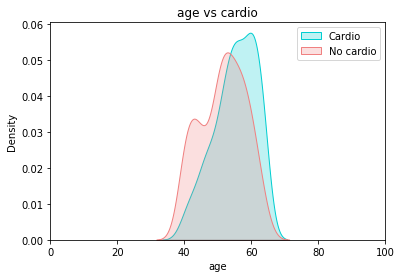

In [9]:
age_non_null = pd.DataFrame(cardio_data_train[cardio_data_train.age.notnull()])
sns.kdeplot(
    data = age_non_null.loc[(age_non_null['cardio'] == 1), 'age'],
    color = 'darkturquoise',
    shade = True
)
sns.kdeplot(
    data = age_non_null.loc[(age_non_null['cardio'] == 0), 'age'],
    color = 'lightcoral',
    shade = True
)
plt.legend(['Cardio', 'No cardio'])
plt.title('age vs cardio')
plt.xlim(0, 100)
plt.show()

**Observation:**
- As we can see from the density plot, age density distribution of people with cardio disease is on the right side of density distribution of people with no cardio disease. 
- This suggests that people with higher age(>55) have more risk for cardio disease than people with lesser age(<45).

#### f. Find the age groups whose survival rate is the largest

In [10]:
# using only the records that have value for 'age' column
bins = ["30-35", "35-40", "40-45", "45-50", "50-55", "55-60", "60-65", "65-70", "70-75"]
lo = [30, 35, 40, 45, 50, 55, 60, 65, 70]
hi = [35, 40, 45, 50, 55, 60, 65, 70, 75]
counts = [0] * len(bins)
survivors = [0] * len(bins)
ages = pd.DataFrame(age_non_null['age'])
cardios = pd.DataFrame(age_non_null['cardio'])
bins_age = [''] * len(ages)
print("creating bins of", str(len(ages)), "people.")
for r in range(len(ages)):
    age = ages.values[r]
    cardio = cardios.values[r]
    for i in range(len(bins)):
        if age >= lo[i] and age < hi[i]:
            counts[i] += 1
            bins_age[r] = bins[i]
            if cardio == 0:
                survivors[i] += 1
            break

for i in range(len(bins)):
    sur_rate = 0
    if counts[i] != 0:
        sur_rate = survivors[i]/counts[i]
    print("In age group", bins[i], ", total people:", counts[i], ", people with no cardio:", survivors[i], ", survival rate:", round(sur_rate, 2))
    

creating bins of 335 people.
In age group 30-35 , total people: 0 , people with no cardio: 0 , survival rate: 0
In age group 35-40 , total people: 1 , people with no cardio: 1 , survival rate: 1.0
In age group 40-45 , total people: 48 , people with no cardio: 36 , survival rate: 0.75
In age group 45-50 , total people: 37 , people with no cardio: 18 , survival rate: 0.49
In age group 50-55 , total people: 96 , people with no cardio: 51 , survival rate: 0.53
In age group 55-60 , total people: 73 , people with no cardio: 34 , survival rate: 0.47
In age group 60-65 , total people: 80 , people with no cardio: 22 , survival rate: 0.28
In age group 65-70 , total people: 0 , people with no cardio: 0 , survival rate: 0
In age group 70-75 , total people: 0 , people with no cardio: 0 , survival rate: 0


Age group 40-45 has the most survival rate.

Note: Ignoring the 1 person in age group 35-40 as we cannot generalize survival rate for that age group.

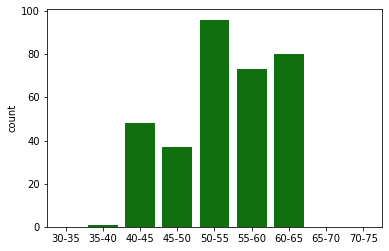

In [11]:
sns.countplot(x=bins_age, color="g", order = bins)
plt.show()

**Observations:**
- From countplot above, we can see the distribution of people in age groups of 5 years. 
- People can be divided into bins from age 35-40 to 60-65 as we have people from age 39 to 64 years in our data.
- We have highest count of people from age group 50-55. 
- 75% of people from age group 40-45 (36 out of 38) have cardio=0, which makes it age group with highest survival rate.

Let's replace categorical features having non-numerical values with integer values.

In [12]:
print("cholesterol unique values: ", cardio_data_train["cholesterol"].unique())
print("glucose unique values: ", cardio_data_train["gluc"].unique())
print("gender unique values: ", cardio_data_train["gender"].unique())

cholesterol unique values:  [nan 'Normal' 'High' 'Above Normal']
glucose unique values:  ['Normal' nan 'High' 'Above Normal']
gender unique values:  [nan 'Men' 'Women']


In [13]:
#High=2, Above Normal=1, Normal=0
def replace012(x):
    if x == "High":
        return 2
    elif x == "Above Normal":
        return 1
    elif x =="Normal":
        return 0

cardio_data_train["cholesterol"] = cardio_data_train["cholesterol"].apply(replace012)
cardio_data_train["gluc"] = cardio_data_train["gluc"].apply(replace012)

In [14]:
#Women=0, Men=1
def replace01(x):
    if x == "Women":
        return 0
    elif x == "Men":
        return 1
cardio_data_train["gender"] = cardio_data_train["gender"].apply(replace01)

Train data: 
Number of data points for class_0: 249 
Number of data points for class_1: 251 


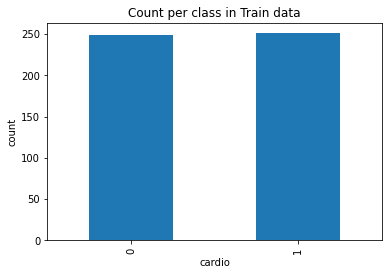

In [15]:
#getting the number of points each class has
class_0 = len(cardio_data_train[cardio_data_train["cardio"] == 0])
class_1 = len(cardio_data_train[cardio_data_train["cardio"] == 1])

print("Train data: ")
print("Number of data points for class_0: %d "%class_0)
print("Number of data points for class_1: %d "%class_1)

cardio_data_train.groupby("cardio")["id"].count().plot.bar()
plt.ylabel("count")
plt.title("Count per class in Train data")
plt.show()

In [16]:
#dropping the "id" column
cardio_data_train.drop("id", axis=1, inplace=True)

In [17]:
cardio_data_train.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,56.0,NaN,163.0,75.0,120.0,NaN,NaN,0.0,0.0,0.0,1.0,0
1,44.0,1.0,168.0,68.0,110.0,70.0,NaN,NaN,0.0,0.0,NaN,0
2,54.0,NaN,170.0,75.0,120.0,NaN,NaN,0.0,0.0,0.0,1.0,1
3,52.0,1.0,NaN,89.0,NaN,80.0,0.0,NaN,0.0,NaN,NaN,0
4,NaN,NaN,158.0,74.0,NaN,93.0,2.0,NaN,0.0,1.0,1.0,1


In [18]:
cardio_data_train.isna().sum()

age            165
gender         171
height         302
weight         164
ap_hi          153
ap_lo          168
cholesterol    167
gluc           167
smoke          174
alco           165
active         157
cardio           0
dtype: int64

In [19]:
#replacing NaN values with mean in numerical before finding relationships between features and target variable
#replacing NaN values with mode in categorical attributes

from scipy import stats

numerical_columns = ["age", "ap_hi", "ap_lo", "smoke", "alco", "active", "height", "weight"]
for col in numerical_columns:
    cardio_data_train.loc[:,col].replace(np.nan, np.nanmean(cardio_data_train[col]), inplace=True)


categorical_columns = ["cholesterol","gluc","gender"]
for col in categorical_columns:
    cardio_data_train.loc[:,col].replace(np.nan, stats.mode(cardio_data_train[col])[0][0], inplace=True)

cardio_data_train.isna().sum()


age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

#### g. Find similar relationships for at least 3-4 columns that you think can play a role in prediction (For example, systolic BP, cholesterol etc.)

Using density plots to find relationships between few features and target variable. 
Note: All the NaN values have been replaced with mean(numeric features)/mode(categorical features) in previous cell. So now, in following plots, we will use entire training set (500 rows).

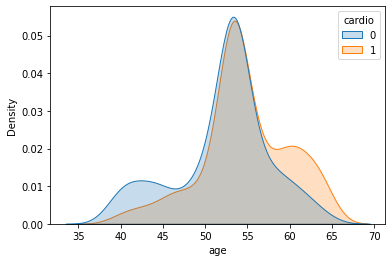

In [20]:
sns.kdeplot(x="age",hue="cardio",fill=True,data=cardio_data_train)
plt.show()

**Observations:**
- We can see in the kde plot that people arround the age 35-45 have higher chance of cardio=0.
- People around the age 50-55 have high survival rate as well as high fatality rate. 
- People with age 57-70 have high chance of having cardio=1.

[]

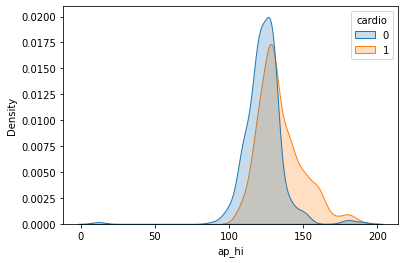

In [21]:
sns.kdeplot(x="ap_hi",hue="cardio",fill=True,data=cardio_data_train)
plt.plot()

**Observations:**
- People with average Systolic blood pressure(ap_hi) have higher chance of having cardio=0, i.e. there is higher chance that they don't have cardio disease.

[]

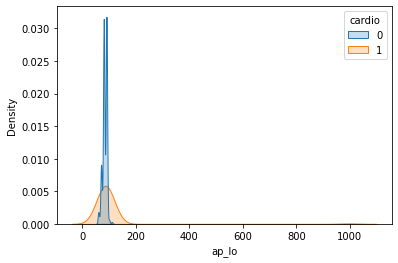

In [22]:
sns.kdeplot(x="ap_lo",hue="cardio",fill=True,data=cardio_data_train)
plt.plot()

**Observations:**
- We can see from density plot of ap_lo that people with average Diastolic blood pressure(ap_lo) have very high probability of not having cardio disease. 

[]

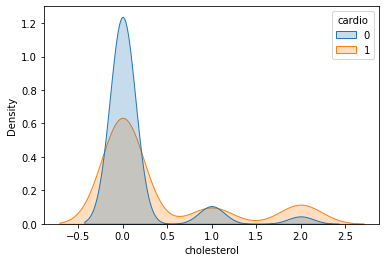

In [23]:
sns.kdeplot(x="cholesterol",hue="cardio",fill=True,data=cardio_data_train)
plt.plot()

**Observations:**
- From density plot of cholesterol, we can see that people with Normal(0) cholesterol have higher chance of cardio=0. i.e. there is high chance that they will not have cardio disease, than people who have more cholesterol. 

[]

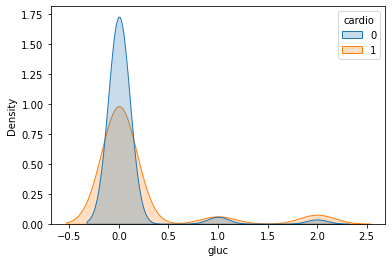

In [24]:
sns.kdeplot(x="gluc",hue="cardio",fill=True,data=cardio_data_train)
plt.plot()

**Observations:**
- In the "gluc" kde plot, we can see that, people who have Normal(0) glucose have higher chance of cardio=0, i.e there is a high chance that they wont have cardiovascular disease, than the people who have more glucose.

[]

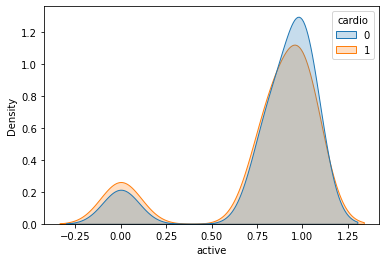

In [25]:
sns.kdeplot(x="active",hue="cardio",fill=True,data=cardio_data_train)
plt.plot()

**Observations:**
- In the "active" kde plot, we can see that, people who are more physically active have a slightly higher chance of cardio = 0, i.e there is a high chance that they won't have cardiovascular disease, than the people who have less physically active.

[]

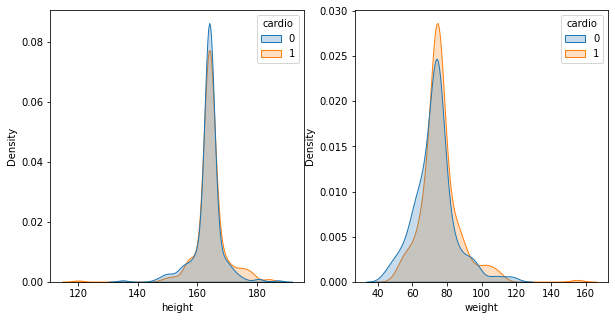

In [26]:
fig,ax = plt.subplots(1,2, figsize=(10,5))
sns.kdeplot(x="height",hue="cardio",fill=True,data=cardio_data_train,ax=ax[0])
sns.kdeplot(x="weight",hue="cardio",fill=True,data=cardio_data_train,ax=ax[1])
plt.plot()

**Observations:**
- In kde plot of height, the plot of cardio=0 and cardio=1 is roughly the same and from this we can also tell height column does not add much importance, so we can drop height column when we are building our model.
- In kde plot of weight, the plot of cardio=0 and cardio=1 is roughly the same and from this we can also tell weight column does not add much importance, so we can drop weight column when we are building our model.

#### h. Get more visuals on data distributions

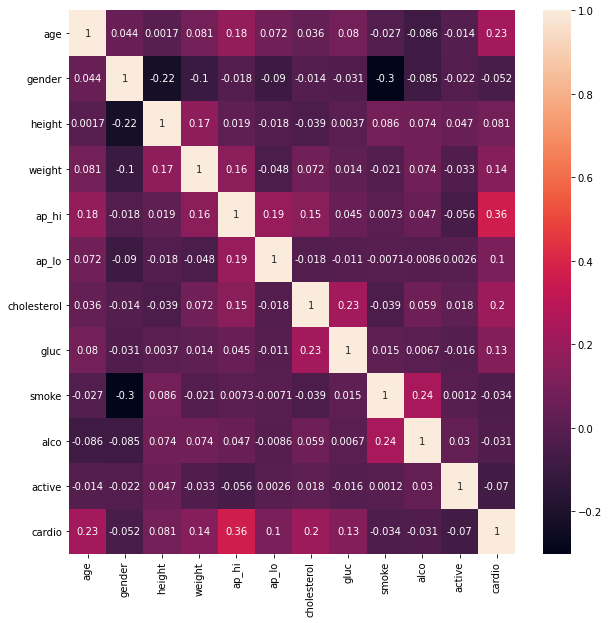

In [27]:
#i. Use plotCorrelationMatrix
corr_matrix = cardio_data_train.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix, annot=True)
plt.show()

<Figure size 432x288 with 0 Axes>

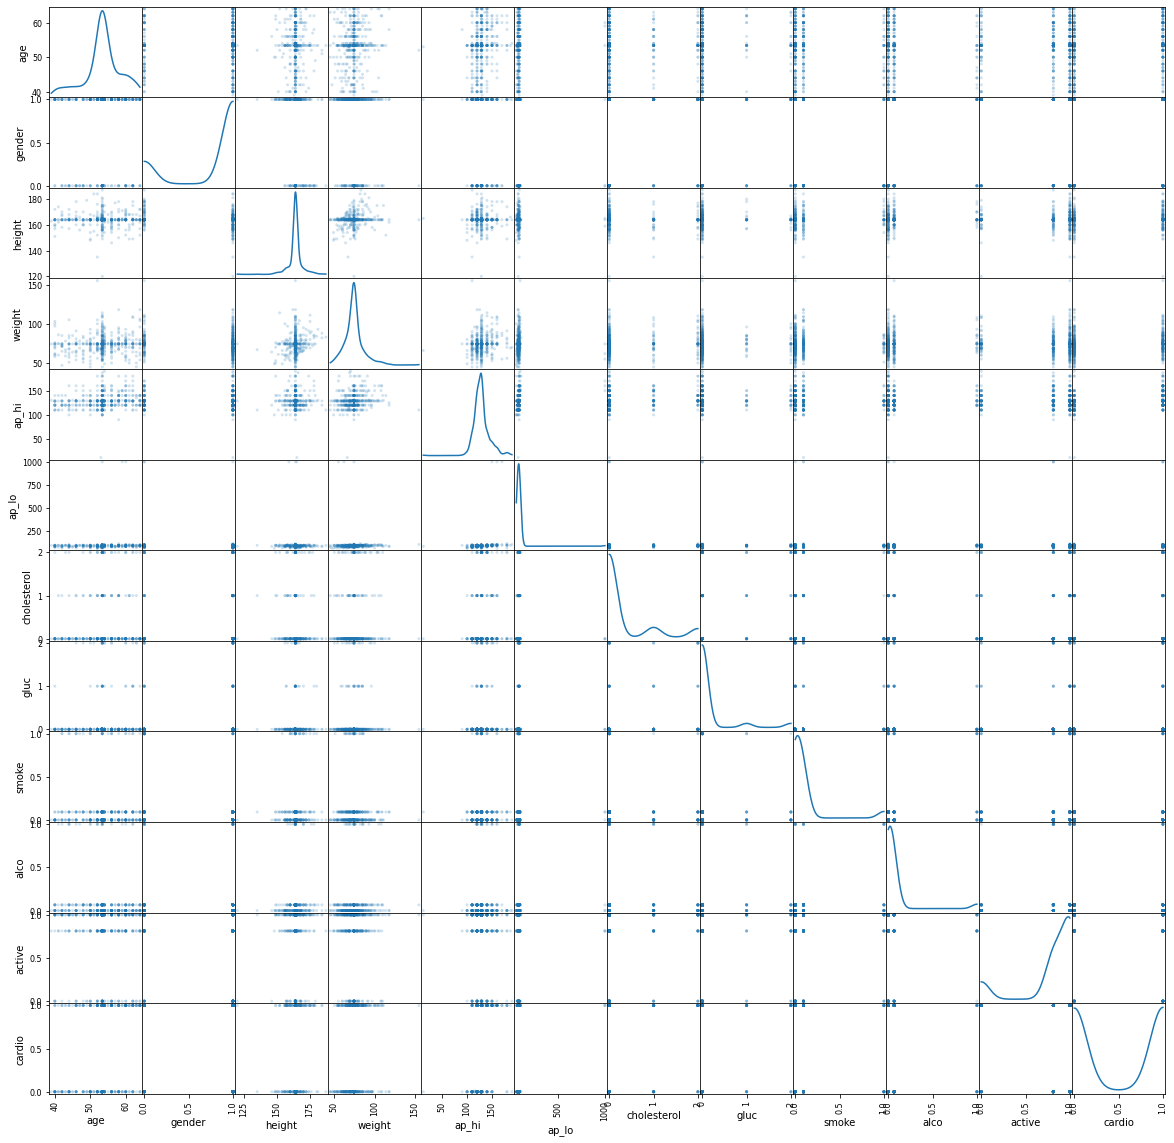

In [31]:
# ii. plotScatterMatrix
plt.figure()
pd.plotting.scatter_matrix(cardio_data_train, figsize=(20,20), diagonal="kde", alpha=0.2)
plt.show()

[]

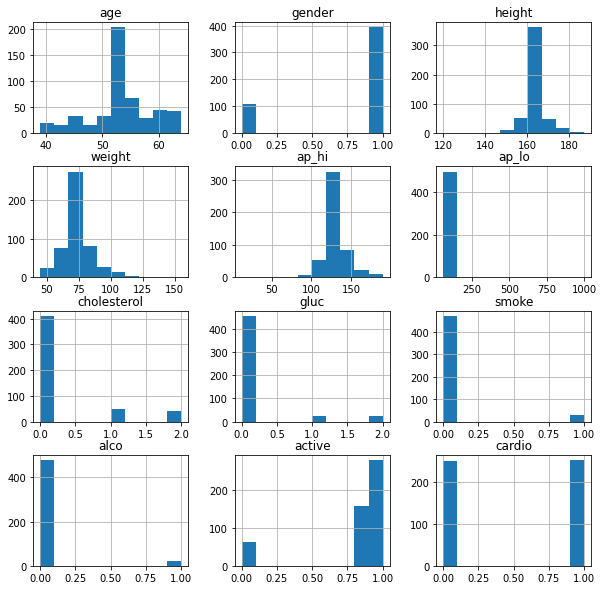

In [34]:
#iii. plotPerColumnDistribution
cardio_data_train.hist(figsize=(10,10))
plt.plot()

**Observations:**
- 'ap_hi', 'age', 'cholesterol' have highest correlation with cardio in decreasing order, suggesting that these are top 3 most important features.
- 'height', 'gender', 'smoke', 'alco', 'active' these features have very less correlation with cardio. These columns will contribute very less in our prediction task.

#### i. Find missing values

#### i. Get the count of missing values

In [32]:
cardio_data_train_missing = pd.read_csv("cardio-train.csv", sep=";")
for col in cardio_data_train_missing.columns:
    print("number of null values in column " + col + ":", cardio_data_train_missing[col].isnull().sum())

number of null values in column id: 0
number of null values in column age: 165
number of null values in column gender: 171
number of null values in column height: 302
number of null values in column weight: 164
number of null values in column ap_hi: 153
number of null values in column ap_lo: 168
number of null values in column cholesterol: 167
number of null values in column gluc: 167
number of null values in column smoke: 174
number of null values in column alco: 165
number of null values in column active: 157
number of null values in column cardio: 0


#### ii. Plot a heat map for missing values

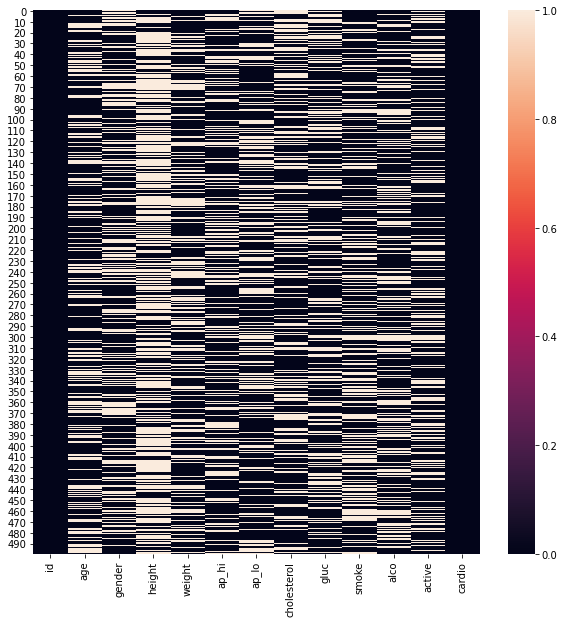

In [33]:
plt.figure(figsize=(10,10))
sns.heatmap(cardio_data_train_missing.isnull())
plt.show()

**Observations:**
- Above plot shows the heatmap of null values per column.
- We can clearly see that 'height' column has most null values as it has most light colour. 
- 'cardio' and 'id' has entire column with black colour, which indicates 0 missing values for these columns.

In [34]:
# turning categorical string values into numerical values
cardio_data_train_missing["cholesterol"] = cardio_data_train_missing["cholesterol"].apply(replace012)
cardio_data_train_missing["gluc"] = cardio_data_train_missing["gluc"].apply(replace012)
cardio_data_train_missing["gender"] = cardio_data_train_missing["gender"].apply(replace01) 
cardio_data_train_missing.drop("id",axis=1,inplace=True)

#### j. Applying a different technique to handle missing values (For each technique verify your predictionresults)

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score

def test_logistic_regression_model(data):
    scalar = MinMaxScaler()
    y = data.loc[:,"cardio"]
    X = data.drop("cardio",1)
    X = scalar.fit_transform(X)
    x_train,x_test,y_train,y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1)
    clf = LogisticRegression()
    clf.fit(x_train,y_train)

    y_pred_test = clf.predict(x_test)
    y_pred_train = clf.predict(x_train)

    accuracy_train = accuracy_score(y_train,y_pred_train)
    accuracy_test = accuracy_score(y_test,y_pred_test)
    f1 = f1_score(y_test,y_pred_test)
    return accuracy_train, accuracy_test, f1


In [18]:
orig_cardio_data_train = cardio_data_train.copy()

In [19]:
drop_na_data_train = orig_cardio_data_train.copy().dropna()

accuracy_train, accuracy_test, f1 = test_logistic_regression_model(drop_na_data_train)

print("Train Accuracy after dropping rows with NaN values: ",accuracy_train)
print("Test Accuracy after dropping rows with NaN values: ",accuracy_test)
print("f1 score after dropping rows with NaN values: ",f1)

Train Accuracy after dropping rows with NaN values:  1.0
Test Accuracy after dropping rows with NaN values:  0.5
f1 score after dropping rows with NaN values:  0.0


In [20]:
mean_na_data_train = orig_cardio_data_train.copy()
for x in mean_na_data_train.columns:
    mean_column = np.nanmean(mean_na_data_train[x].values)
    mean_na_data_train[x].replace(np.nan, mean_column, inplace=True)
    
accuracy_train, accuracy_test, f1 = test_logistic_regression_model(mean_na_data_train)

print("Train Accuracy after replacing NaN with mean: ",accuracy_train)
print("Test Accuracy after replacing NaN with mean: ",accuracy_test)
print("f1 score after replacing NaN with mean: ",f1)

Train Accuracy after replacing NaN with mean:  0.6725
Test Accuracy after replacing NaN with mean:  0.69
f1 score after replacing NaN with mean:  0.686868686868687


## Applying the model

In [21]:
train_data = pd.read_csv("cardio-train.csv", sep=";")
print(train_data.shape)
train_data.head()

(500, 13)


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,92150,20535.0,NaN,163.0,75.0,120.0,NaN,NaN,Normal,0.0,0.0,1.0,0
1,88880,16125.0,Men,168.0,68.0,110.0,70.0,NaN,NaN,0.0,0.0,NaN,0
2,10483,19761.0,NaN,170.0,75.0,120.0,NaN,NaN,Normal,0.0,0.0,1.0,1
3,22798,19035.0,Men,NaN,89.0,NaN,80.0,Normal,NaN,0.0,NaN,NaN,0
4,85542,NaN,NaN,158.0,74.0,NaN,93.0,High,NaN,0.0,1.0,1.0,1


In [22]:
validation_data = pd.read_csv("cardio-validation.csv", sep=",")
print(validation_data.shape)
validation_data.head()

(500, 13)


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,17934,18936.0,Men,165.0,60.0,NaN,80.0,Normal,NaN,0.0,0.0,1.0,1
1,52450,17987.0,NaN,NaN,58.8,120.0,90.0,Normal,Normal,NaN,0.0,1.0,0
2,37653,NaN,NaN,159.0,93.0,130.0,90.0,High,Normal,0.0,0.0,NaN,1
3,96970,22851.0,Women,172.0,NaN,NaN,100.0,Normal,Normal,0.0,0.0,1.0,1
4,50977,NaN,Women,NaN,116.0,NaN,80.0,High,NaN,NaN,NaN,1.0,1


In [23]:
train_data.describe()

,id,age,height,weight,ap_hi,ap_lo,smoke,alco,active,cardio
count,500.000000,335.000000,198.000000,336.000000,347.000000,332.000000,326.000000,335.000000,343.000000,500.000000
mean,50279.916000,19490.886567,163.934343,74.347321,128.685879,90.060241,0.092025,0.065672,0.813411,0.502000
std,29913.623631,2466.702487,8.258559,14.335964,18.490176,87.396945,0.289505,0.248078,0.390150,0.500497
min,38.000000,14334.000000,120.000000,45.000000,12.000000,60.000000,0.000000,0.000000,0.000000,0.000000
25%,23446.500000,17988.500000,159.250000,65.000000,120.000000,80.000000,0.000000,0.000000,1.000000,0.000000
50%,51913.500000,19719.000000,165.000000,72.000000,120.000000,80.000000,0.000000,0.000000,1.000000,1.000000
75%,78656.000000,21597.500000,168.000000,82.000000,140.000000,90.000000,0.000000,0.000000,1.000000,1.000000
max,99662.000000,23479.000000,187.000000,155.000000,190.000000,1000.000000,1.000000,1.000000,1.000000,1.000000


In [24]:
train_data.isna().sum()

id               0
age            165
gender         171
height         302
weight         164
ap_hi          153
ap_lo          168
cholesterol    167
gluc           167
smoke          174
alco           165
active         157
cardio           0
dtype: int64

In [25]:
train_data.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [26]:
mean_cols = ['age', 'height', 'weight', 'ap_hi']
median_cols = ['ap_lo']
mode_cols = ['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']
# outlier_cols = ['height', 'weight', 'ap_lo']
outlier_cols = []

In [27]:
def preprocess(data):
    data.drop("id", axis=1, inplace=True, errors='ignore')
    data["cholesterol"] = data["cholesterol"].apply(replace012)
    data["gluc"] = data["gluc"].apply(replace012)
    data["gender"] = data["gender"].apply(replace01)
    data["age"] = (data["age"]/365).round()
    
    for col in mean_cols:
        mean_column = np.nanmean(data[col].values)
        data[col].replace(np.nan, mean_column, inplace=True)
    for col in median_cols:
        median_column = np.nanmedian(data[col].values)
        data[col].replace(np.nan, median_column, inplace=True)
    for col in mode_cols:
        mode_column, _ = stats.mode(data[col])
        data[col].replace(np.nan, mode_column[0], inplace=True)
    
    for col in outlier_cols:
        low = data[col].quantile(0.10)
        high = data[col].quantile(0.90)
        med = data[col].quantile(0.50)
        data[col] = np.where(data[col] < low, med, data[col])
        data[col] = np.where(data[col] > high, med, data[col])
        
    return data


In [28]:
train_data = preprocess(train_data)
validation_data = preprocess(validation_data)

In [29]:
train_data.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,56.00000,1.0,163.000000,75.0,120.000000,80.0,0.0,0.0,0.0,0.0,1.0,0
1,44.00000,1.0,168.000000,68.0,110.000000,70.0,0.0,0.0,0.0,0.0,1.0,0
2,54.00000,1.0,170.000000,75.0,120.000000,80.0,0.0,0.0,0.0,0.0,1.0,1
3,52.00000,1.0,163.934343,89.0,128.685879,80.0,0.0,0.0,0.0,0.0,1.0,0
4,53.38806,1.0,158.000000,74.0,128.685879,93.0,2.0,0.0,0.0,1.0,1.0,1


In [30]:
validation_data.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,52.000000,1.0,165.000000,60.000000,126.406736,80.0,0.0,0.0,0.0,0.0,1.0,1
1,49.000000,1.0,164.639706,58.800000,120.000000,90.0,0.0,0.0,0.0,0.0,1.0,0
2,53.046392,1.0,159.000000,93.000000,130.000000,90.0,2.0,0.0,0.0,0.0,1.0,1
3,63.000000,0.0,172.000000,73.778316,126.406736,100.0,0.0,0.0,0.0,0.0,1.0,1
4,53.046392,0.0,164.639706,116.000000,126.406736,80.0,2.0,0.0,0.0,0.0,1.0,1


In [31]:
train_data.isna().sum()

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [32]:
validation_data.isna().sum()

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [33]:
train_data.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,53.388060,0.786000,163.934343,74.347321,128.685879,86.680000,0.26400,0.132000,0.060000,0.044000,0.872000,0.502000
std,5.523053,0.410538,5.189041,11.746245,15.396741,71.339079,0.60252,0.450535,0.237725,0.205301,0.334424,0.500497
min,39.000000,0.000000,120.000000,45.000000,12.000000,60.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,52.000000,1.000000,163.934343,69.000000,120.000000,80.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,53.388060,1.000000,163.934343,74.347321,128.685879,80.000000,0.00000,0.000000,0.000000,0.000000,1.000000,1.000000
75%,56.000000,1.000000,163.934343,78.000000,130.000000,80.000000,0.00000,0.000000,0.000000,0.000000,1.000000,1.000000
max,64.000000,1.000000,187.000000,155.000000,190.000000,1000.000000,2.00000,2.000000,1.000000,1.000000,1.000000,1.000000


age
45.0
60.0
gender
0.0
1.0
height
159.9
168.0
weight
60.900000000000006
88.0
ap_hi
110.0
150.0
ap_lo
80.0
90.0
cholesterol
0.0
1.0
gluc
0.0
0.0
smoke
0.0
0.0
alco
0.0
0.0
active
0.0
1.0
cardio
0.0
1.0


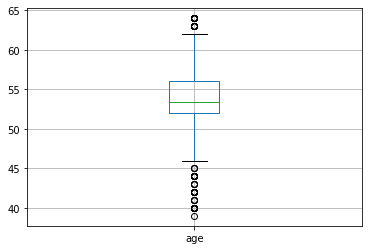

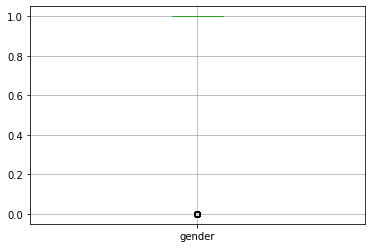

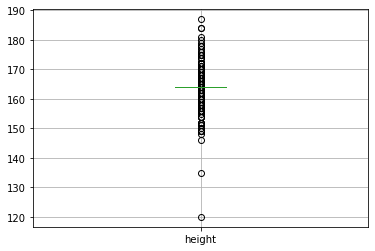

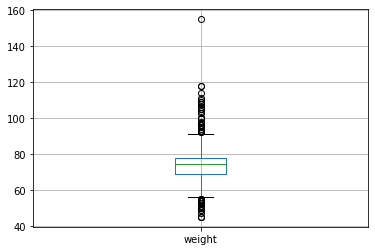

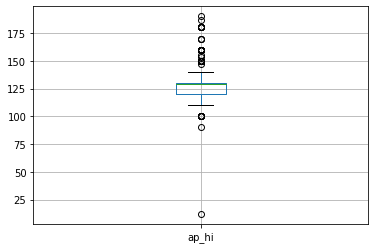

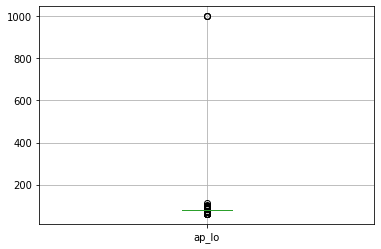

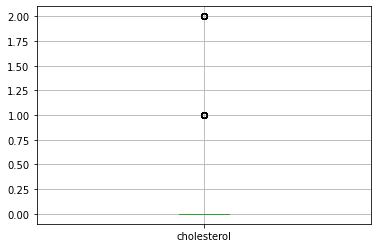

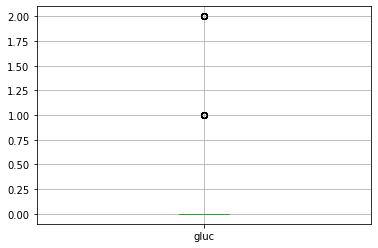

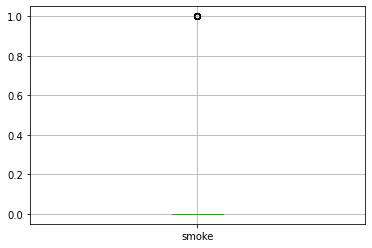

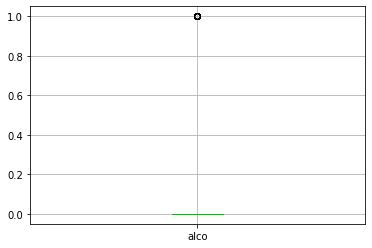

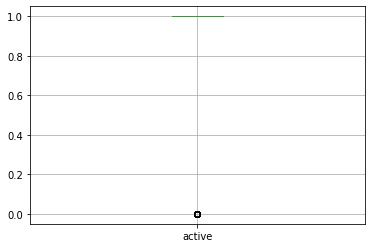

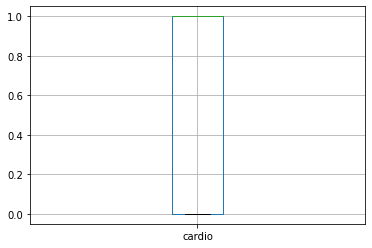

In [34]:
for col in train_data.columns:
    plt.figure()
    train_data.boxplot([col])
    print(col)
    print(train_data[col].quantile(0.10))
    print(train_data[col].quantile(0.90))

In [35]:
total_train_data = train_data.append(validation_data)
y = total_train_data.loc[:,"cardio"]
X = total_train_data.drop("cardio", 1)

scalar = MinMaxScaler()
X = scalar.fit_transform(X)


In [36]:
x_train,x_test,y_train,y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1)

In [37]:
clf_log_reg = LogisticRegression()
clf_log_reg.fit(x_train,y_train)

y_pred_test = clf_log_reg.predict(x_test)
y_pred_train = clf_log_reg.predict(x_train)

print("Train Accuracy: ", accuracy_score(y_train,y_pred_train))
print("Test Accuracy: ", accuracy_score(y_test,y_pred_test))
print("f1 score: ",f1_score(y_test,y_pred_test))

# kagggle score=0.68000 (Logistic Regression)

Train Accuracy:  0.71125
Test Accuracy:  0.715
f1 score:  0.7046632124352332


In [38]:
c_values = [100, 10, 1.0, 0.1, 0.01]
for c in c_values:
    clf = LogisticRegression(C = c)
    clf.fit(x_train,y_train)
    y_pred_test = clf.predict(x_test)
    y_pred_train = clf.predict(x_train)
    print("c = ", c)
    print("Train Accuracy: ", accuracy_score(y_train,y_pred_train))
    print("Test Accuracy: ", accuracy_score(y_test,y_pred_test))
    print("f1 score: ",f1_score(y_test,y_pred_test))

c =  100
Train Accuracy:  0.72375
Test Accuracy:  0.69
f1 score:  0.6702127659574467
c =  10
Train Accuracy:  0.7175
Test Accuracy:  0.695
f1 score:  0.6737967914438503
c =  1.0
Train Accuracy:  0.71125
Test Accuracy:  0.715
f1 score:  0.7046632124352332
c =  0.1
Train Accuracy:  0.6725
Test Accuracy:  0.675
f1 score:  0.6596858638743456
c =  0.01
Train Accuracy:  0.63375
Test Accuracy:  0.61
f1 score:  0.5185185185185185


In [65]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error

from tqdm import tqdm
estimators = [100,200,400]
max_depth = range(5,12)
min_samples_split = range(2,11)

for i in estimators:
    for j in max_depth:
        for k in min_samples_split:
            rf_basic = RandomForestClassifier(n_estimators=i, criterion='entropy', max_depth=j, min_samples_split=k, n_jobs=-1, random_state=1)
            rf_basic.fit(x_train,y_train)
            y_pred_basic_rf = rf_basic.predict(x_test)
            rmse = mean_squared_error(y_test,y_pred_basic_rf,squared=False)
            f1 = f1_score(y_test,y_pred_basic_rf)
            if rmse < 0.50 or f1 > 0.71:
                print("for n_estimators =", i,"and max depth = ", j," min_samples_split: ",k)
                print("rmse=", rmse, "f1 score=", f1)

for n_estimators = 200 and max depth =  11  min_samples_split:  10
rmse= 0.5099019513592785 f1 score= 0.7263157894736841


In [40]:
rf_basic = RandomForestClassifier(n_estimators=200, criterion='entropy', max_depth=11,min_samples_split=10,n_jobs=-1)
rf_basic.fit(x_train,y_train)
y_pred_basic_rf = rf_basic.predict(x_test)
rmse = mean_squared_error(y_test,y_pred_basic_rf,squared=False)
f1 = f1_score(y_test,y_pred_basic_rf)
print("rmse score: ",rmse, ", f1 score=", f1)

# kagggle score=0.70400 (RF(200,11,10))

rmse score:  0.5196152422706632 , f1 score= 0.7127659574468085


In [41]:
from sklearn.svm import SVC
from sklearn.metrics import f1_score
c_values = [10**x for x in range(-6,5)]
kernel = ['poly', 'rbf', 'sigmoid','linear']
# gamma = [1,0.1,0.01,0.001]
gamma = ['auto']
f1_score_val = []
for k in kernel:
    for c in c_values:
        for g in gamma:
            svc_basic_all = SVC(C=c, kernel=k)
            svc_basic_all.fit(x_train,y_train)
            y_pred_svc_basic_all = svc_basic_all.predict(x_test)
            f1 = f1_score(y_test,y_pred_svc_basic_all)
            f1_score_val.append(f1)
            if f1 > 0.70:
                print("kernel=", k, ", C=", c, ", gamma=", g)
                print("f1 score: ",f1)

kernel= poly , C= 10 , gamma= auto
f1 score:  0.7191011235955057
kernel= rbf , C= 100 , gamma= auto
f1 score:  0.7071823204419891
kernel= rbf , C= 10000 , gamma= auto
f1 score:  0.7015706806282723


In [42]:
from sklearn.metrics import classification_report
svc_basic_all = SVC(C=10, kernel='poly')
svc_basic_all.fit(x_train,y_train)
y_pred_svc_basic_all = svc_basic_all.predict(x_test)
print(classification_report(y_test,y_pred_svc_basic_all))
print("f1 score: ", f1_score(y_test,y_pred_svc_basic_all))
print("rmse: ",mean_squared_error(y_test,y_pred_svc_basic_all,squared=False))

# kagggle score=0.68800 (SVC(c=10))

              precision    recall  f1-score   support

           0       0.71      0.85      0.77       101
           1       0.81      0.65      0.72        99

    accuracy                           0.75       200
   macro avg       0.76      0.75      0.75       200
weighted avg       0.76      0.75      0.75       200

f1 score:  0.7191011235955057
rmse:  0.5


In [43]:
alpha = [5, 11, 15, 21, 31, 41, 51, 56, 99]
f1_score_val = []
from sklearn.neighbors import KNeighborsClassifier
for i in alpha:
    knn_basic = KNeighborsClassifier(n_neighbors=i, weights="distance")
    knn_basic.fit(x_train,y_train)
    y_pred_knn_basic = knn_basic.predict(x_test)
    f1 = f1_score(y_test,y_pred_knn_basic)
    f1_score_val.append(f1)
    print("C = ",i)
    print("f1 score: ",f1)

C =  5
f1 score:  0.5970149253731343
C =  11
f1 score:  0.6349206349206349
C =  15
f1 score:  0.6276595744680851
C =  21
f1 score:  0.6387434554973822
C =  31
f1 score:  0.6373626373626373
C =  41
f1 score:  0.6373626373626373
C =  51
f1 score:  0.6153846153846153
C =  56
f1 score:  0.611111111111111
C =  99
f1 score:  0.6057142857142856


In [44]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from numpy import arange

base_estimators = [10, 50, 100, 200, 400]
for n in base_estimators:
    for i in arange(0.1, 1.1, 0.1):
        bagging_model = BaggingClassifier(n_estimators = n, max_samples = i)
        bagging_model.fit(x_train, y_train)
        y_pred_bagging = bagging_model.predict(x_test)
        f1 = f1_score(y_test,y_pred_bagging)
        acc = accuracy_score(y_test, y_pred_bagging)
        if f1 > 0.72:
            print("n_estimators:", n, "max_samples:", round(i,2), "accuracy:", acc, "f1 score:", f1)

n_estimators: 50 max_samples: 0.2 accuracy: 0.73 f1 score: 0.7244897959183673
n_estimators: 50 max_samples: 0.5 accuracy: 0.725 f1 score: 0.72636815920398
n_estimators: 100 max_samples: 0.2 accuracy: 0.73 f1 score: 0.7272727272727273
n_estimators: 100 max_samples: 0.4 accuracy: 0.745 f1 score: 0.746268656716418
n_estimators: 100 max_samples: 0.5 accuracy: 0.72 f1 score: 0.7200000000000001
n_estimators: 100 max_samples: 0.7 accuracy: 0.715 f1 score: 0.7219512195121951
n_estimators: 100 max_samples: 0.8 accuracy: 0.72 f1 score: 0.7281553398058253
n_estimators: 100 max_samples: 0.9 accuracy: 0.725 f1 score: 0.7342995169082125
n_estimators: 200 max_samples: 0.2 accuracy: 0.73 f1 score: 0.7326732673267327
n_estimators: 200 max_samples: 0.9 accuracy: 0.72 f1 score: 0.7307692307692308
n_estimators: 200 max_samples: 1.0 accuracy: 0.72 f1 score: 0.7281553398058253
n_estimators: 400 max_samples: 0.2 accuracy: 0.73 f1 score: 0.7244897959183673
n_estimators: 400 max_samples: 0.8 accuracy: 0.715 f1

In [45]:
bagging_model = BaggingClassifier(n_estimators = 200)
bagging_model.fit(x_train, y_train)
y_pred_bagging = bagging_model.predict(x_test)
f1 = f1_score(y_test,y_pred_bagging)
acc = accuracy_score(y_test, y_pred_bagging)
print("accuracy:", acc, "f1 score:", f1)
# kagggle score=0.68800 (Bagging(DT, 50, 0.2))

accuracy: 0.71 f1 score: 0.7211538461538463


In [54]:
import xgboost as xgb
from xgboost import XGBClassifier

xgb_model = XGBClassifier(gamma=15,colsample_bylevel=0.3,reg_alpha=0.01, max_depth=3, reg_lambda=0.0001)
xgb_model.fit(x_train, y_train)

y_pred = xgb_model.predict(x_test)
mean_squared_error(y_test, y_pred,squared=False)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/xgboost/sklearn.py:1212: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.5567764362830022

In [64]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(estimators=[('xgb', xgb_model),('knn_basic_a', knn_basic),('svc', svc_basic_all),('rf', rf_basic)], voting='hard')
voting_clf.fit(x_train,y_train)
y_pred_voting = voting_clf.predict(x_test)
print(classification_report(y_test,y_pred_voting))
print("f1 score: ",f1_score(y_test,y_pred_voting))
print("rmse: ",mean_squared_error(y_test,y_pred_voting,squared=False))
# kagggle score=0.72000 (Voting(xgb, knn,svc))

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/xgboost/sklearn.py:1212: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


              precision    recall  f1-score   support

           0       0.68      0.84      0.75       101
           1       0.79      0.60      0.68        99

    accuracy                           0.72       200
   macro avg       0.73      0.72      0.72       200
weighted avg       0.73      0.72      0.72       200

f1 score:  0.6781609195402297
rmse:  0.5291502622129182


In [59]:
test_data = pd.read_csv("cardio-test.csv", sep=",")
print(test_data.shape)
test_data.head()

(250, 12)


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,47997,20222,Men,156,57.0,110,70,Normal,Normal,0,1,0
1,15311,18079,Men,160,60.0,120,80,Normal,Normal,0,0,1
2,44269,20279,Women,170,80.0,140,69,Normal,Normal,0,0,1
3,91373,23227,Men,158,80.0,160,90,High,Normal,0,0,1
4,9686,20461,Men,158,92.0,140,90,Normal,Above Normal,0,0,0


In [60]:
test_data.isna().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
dtype: int64

In [61]:
# test_data = preprocess(test_data)
test_data.drop("id", axis=1, inplace=True, errors='ignore')
test_data["cholesterol"] = test_data["cholesterol"].apply(replace012)
test_data["gluc"] = test_data["gluc"].apply(replace012)
test_data["gender"] = test_data["gender"].apply(replace01)

In [62]:
scalar = MinMaxScaler()
test_data = scalar.fit_transform(test_data)

In [63]:
# REPLACE CLF
y_pred_submission = voting_clf.predict(test_data)
df_result = pd.DataFrame(y_pred_submission,columns=["cardio"])
sample = pd.read_csv("sample-submission.csv")
df_result_final = pd.concat([sample.loc[:,"id"],df_result], axis=1)
df_result_final.to_csv("submissions/voting.csv", index=False)